https://github.com/shibuiwilliam/KerasCNNwithMultiClass/blob/master/MultiOut2Cifar10.ipynb

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import os
import copy
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
saveDir = "./multi3cifar10/"
if not os.path.isdir(saveDir):
    os.mkdir(saveDir)

In [3]:
batch_size   = 50
num_classes1 = 10
num_classes2 = 2
num_classes3 = 4
num_classes4 = 2
epochs       = 20

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("x_train.shape", x_train.shape)
print(x_train.shape[0], "train_samples")
print(x_test.shape[0], "test_samples")

x_train.shape (50000, 32, 32, 3)
50000 train_samples
10000 test_samples


In [5]:
x_train = x_train.astype("float32")
x_test  = x_test.astype("float32")
x_train /= 255
x_test  /= 255

In [6]:
label1 = {0:"airplane",
          1:"automobile",
          2:"bird",
          3:"cat",
          4:"deer",
          5:"dog",
          6:"frog",
          7:"horse",
          8:"ship",
          9:"truck"}
label2 = {0:"artifact", #0,1,8,9
          1:"animal"} #2,3,4,5,6,7
label3 = {0:"car", #1,9
          1:"mammal", #3,4,5,7
          2:"fly", #0,2
          3:"water"} #6,8
label4 = {0:"dark", #if average pixel is below 128
          1:"bright"} #if average pixel is over 128

In [7]:
def modelLabel2(y):
    y2 = copy.deepcopy(y)
    for i in range(len(y)):
        if y2[i] in [0, 1, 8, 9]:
            y2[i] = 0
        else:
            y2[i] = 1
    return y2
y_train2 = modelLabel2(y_train)
y_test2  = modelLabel2(y_test)

In [8]:
def modelLabel3(y):
    y3 = copy.deepcopy(y)
    for i in range(len(y)):
        if y3[i] in [1, 9]:
            y3[i] = 0
        elif y3[i] in [3, 4, 5, 7]:
            y3[i] = 1
        elif y3[i] in [0, 2]:
            y3[i] = 2
        else:
            y3[i] = 3
    return y3
y_train3 = modelLabel3(y_train)
y_test3  = modelLabel3(y_test)

In [9]:
def modelLabel4(x):
    y4 =[]
    for i in range(len(x)):
        brightness = np.average(x[i].ravel())
        if brightness < 0.5:
            y4.append([0])
        elif brightness >= 0.5:
            y4.append([1])
    return np.array(y4)
y_train4 = modelLabel4(x_train)
y_test4  = modelLabel4(x_test)

In [10]:
y_train1 = keras.utils.to_categorical(y_train, num_classes1)
y_test1  = keras.utils.to_categorical(y_test,  num_classes1)

y_train2 = keras.utils.to_categorical(y_train2, num_classes2)
y_test2  = keras.utils.to_categorical(y_test2,  num_classes2)

y_train3 = keras.utils.to_categorical(y_train3, num_classes3)
y_test3  = keras.utils.to_categorical(y_test3,  num_classes3)

y_train4 = keras.utils.to_categorical(y_train4, num_classes4)
y_test4  = keras.utils.to_categorical(y_test4,  num_classes4)

print("y train1:{0}\ny test1:{1}\ny train2:{2}\ny test2:{3}\ny train3:{4}\ny test3:{5}\ny train4:{6}\ny test4:{7}".format(
    y_train1.shape, y_test1.shape, y_train2.shape, y_test2.shape, y_train3.shape, y_test3.shape, y_train4.shape, y_test4.shape))

y train1:(50000, 10)
y test1:(10000, 10)
y train2:(50000, 2)
y test2:(10000, 2)
y train3:(50000, 4)
y test3:(10000, 4)
y train4:(50000, 2)
y test4:(10000, 2)


data0 is frog, animal, water and dark


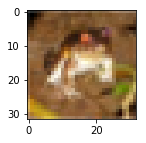

data1 is truck, artifact, car and bright


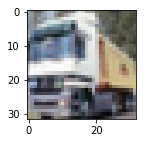

data2 is truck, artifact, car and bright


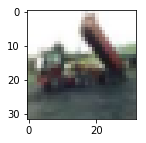

data3 is deer, animal, mammal and dark


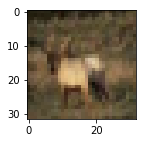

data4 is automobile, artifact, car and dark


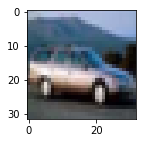

data5 is automobile, artifact, car and dark


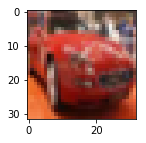

data6 is bird, animal, fly and dark


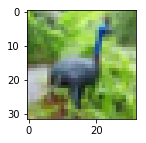

data7 is horse, animal, mammal and dark


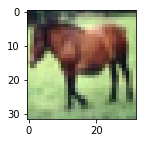

data8 is ship, artifact, water and bright


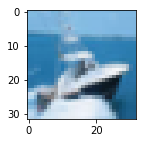

data9 is cat, animal, mammal and dark


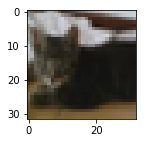

In [11]:
for i in range(10):
    plt.figure(figsize=(2, 2))
    print("data{0} is {1}, {2}, {3} and {4}".format(i, label1[np.argmax(y_train1[i])],
                                                       label2[np.argmax(y_train2[i])],
                                                       label3[np.argmax(y_train3[i])],
                                                       label4[np.argmax(y_train4[i])]))
    plt.imshow(x_train[i].reshape(32, 32, 3))
    plt.show()

In [12]:
cifarInput = Input(shape=(x_train.shape[1:]))

x = Conv2D(32, (3, 3), padding="same", activation="relu")(cifarInput)
x = Conv2D(32, (3, 3), padding="same", activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Conv2D(64, (3, 3), padding="same", activation="relu")(x)
x = Conv2D(64, (3, 3), padding="same", activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)

output1 = Dense(num_classes1, activation="softmax", name="output1")(x)
output2 = Dense(num_classes2, activation="softmax", name="output2")(x)
output3 = Dense(num_classes3, activation="softmax", name="output3")(x)
output4 = Dense(num_classes4, activation="softmax", name="output4")(x)

multiModel = Model(cifarInput, [output1, output2, output3, output4])

multiModel.summary()

W0924 05:19:28.258689 139904887981888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0924 05:19:28.286163 139904887981888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0924 05:19:28.293127 139904887981888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0924 05:19:28.338887 139904887981888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0924 05:19:28.342332 139904887981888 deprecation_wrapp

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 16, 16, 32)   0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
dropout_1 

In [13]:
opt = keras.optimizers.adam(lr=1e-4, decay=1e-6)

multiModel.compile(loss={"output1":"categorical_crossentropy",
                         "output2":"categorical_crossentropy",
                         "output3":"categorical_crossentropy",
                         "output4":"categorical_crossentropy"},
                  optimizer=opt,
                  metrics=["accuracy"])

W0924 05:19:28.709092 139904887981888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0924 05:19:28.735821 139904887981888 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [14]:
def getNewestModel(model, dirname=saveDir):
    from glob import glob
    target = os.path.join(dirname, "*")
    files = [(f, os.path.getmtime(f)) for f in glob(target)]
    if len(files) == 0:
        return model
    else:
        newestModel = sorted(files, key=lambda files:files[1])[-1]
        model.load_weights(newestModel[0])
        return model
multiModel = getNewestModel(multiModel, saveDir)

In [15]:
es_cb = EarlyStopping(monitor="val_loss", patience=3, verbose=1, mode="auto")
chkpt = os.path.join(saveDir, "MultiCifar10_.{epoch:02d}-{val_loss:.2f}-{val_output1_loss:.2f}-{val_output2_loss:.2f}-{val_output3_loss:.2f}-{val_output4_loss:.2f}.hdf5")
cp_cb = ModelCheckpoint(filepath = chkpt, monitor="val_loss", verbose=1, save_best_only=True, mode="auto")

In [16]:
history = multiModel.fit(x_train, {"output1":y_train1,
                                   "output2":y_train2,
                                   "output3":y_train3,
                                   "output4":y_train4},
                        batch_size=batch_size,
                        epochs= epochs,
                        validation_data = (x_test, {"output1":y_test1,
                                                    "output2":y_test2,
                                                    "output3":y_test3,
                                                    "output4":y_test4}),
                         callbacks=[es_cb, cp_cb])

W0924 05:19:29.692543 139904887981888 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 232s 5ms/step - loss: 2.7818 - output1_loss: 1.5136 - output2_loss: 0.2613 - output3_loss: 0.8536 - output4_loss: 0.1533 - output1_acc: 0.4450 - output2_acc: 0.8954 - output3_acc: 0.6505 - output4_acc: 0.9363 - val_loss: 2.5158 - val_output1_loss: 1.3628 - val_output2_loss: 0.2214 - val_output3_loss: 0.7547 - val_output4_loss: 0.1769 - val_output1_acc: 0.5097 - val_output2_acc: 0.9098 - val_output3_acc: 0.6998 - val_output4_acc: 0.9098

Epoch 00001: val_loss improved from inf to 2.51583, saving model to ./multi3cifar10/MultiCifar10_.01-2.52-1.36-0.22-0.75-0.18.hdf5
Epoch 2/20
50000/50000 [==============================] - 232s 5ms/step - loss: 2.5257 - output1_loss: 1.3896 - output2_loss: 0.2406 - output3_loss: 0.7715 - output4_loss: 0.1240 - output1_acc: 0.4953 - output2_acc: 0.9024 - output3_acc: 0.6881 - output4_acc: 0.9502 - val_loss: 2.2619 - val_output1_loss: 1.2680 - val_o

In [17]:
scores = multiModel.evaluate(x_test, {"output1":y_test1, "output2":y_test2, "output3":y_test3, "output4":y_test4}, verbose=1)
print(scores)

10000/10000 [==============================] - 11s 1ms/step
[1.364709260559082, 0.7761714264392853, 0.12961948338449, 0.4083442414283752, 0.05057411352694034, 0.7315, 0.9483, 0.8487, 0.9785]


In [18]:
print("total loss:\t{0}".format(scores[0]))
print("label1 loss:\t{0}\n\taccuracy:\t{1}%".format(scores[1],scores[5]))
print("label2 loss:\t{0}\n\taccuracy:\t{1}%".format(scores[2],scores[6]))
print("label3 loss:\t{0}\n\taccuracy:\t{1}%".format(scores[3],scores[7]))
print("label4 loss:\t{0}\n\taccuracy:\t{1}%".format(scores[4],scores[8]))

total loss:	1.364709260559082
label1 loss:	0.7761714264392853
	accuracy:	0.7315%
label2 loss:	0.12961948338449
	accuracy:	0.9483%
label3 loss:	0.4083442414283752
	accuracy:	0.8487%
label4 loss:	0.05057411352694034
	accuracy:	0.9785%


In [19]:
prediction = multiModel.predict(x_test, verbose=1)

10000/10000 [==============================] - 12s 1ms/step


[Prediction] test data0 is cat, animal, mammal and dark
[Actual]     test data0 is cat, animal, mammal and dark


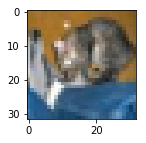


[Prediction] test data1 is ship, artifact, water and bright
[Actual]     test data1 is ship, artifact, water and bright


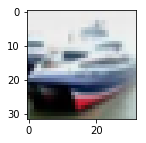


[Prediction] test data2 is ship, artifact, water and bright
[Actual]     test data2 is ship, artifact, water and bright


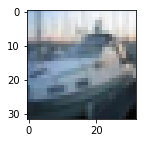


[Prediction] test data3 is airplane, artifact, fly and bright
[Actual]     test data3 is airplane, artifact, fly and bright


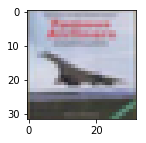


[Prediction] test data4 is frog, animal, water and dark
[Actual]     test data4 is frog, animal, water and dark


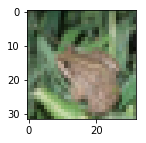


[Prediction] test data5 is frog, animal, water and dark
[Actual]     test data5 is frog, animal, water and dark


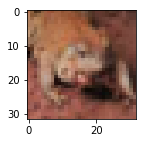


[Prediction] test data6 is automobile, artifact, car and dark
[Actual]     test data6 is automobile, artifact, car and dark


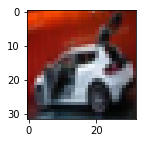


[Prediction] test data7 is frog, animal, water and dark
[Actual]     test data7 is frog, animal, water and dark


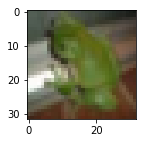


[Prediction] test data8 is cat, animal, mammal and bright
[Actual]     test data8 is cat, animal, mammal and bright


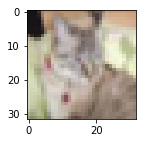


[Prediction] test data9 is automobile, artifact, car and bright
[Actual]     test data9 is automobile, artifact, car and bright


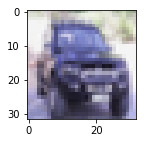


[Prediction] test data10 is airplane, artifact, fly and bright
[Actual]     test data10 is airplane, artifact, fly and bright


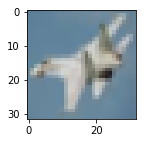


[Prediction] test data11 is truck, artifact, car and bright
[Actual]     test data11 is truck, artifact, car and bright


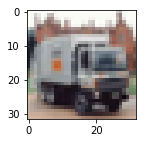


[Prediction] test data12 is dog, animal, mammal and dark
[Actual]     test data12 is dog, animal, mammal and dark


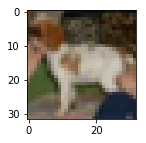


[Prediction] test data13 is horse, animal, mammal and dark
[Actual]     test data13 is horse, animal, mammal and dark


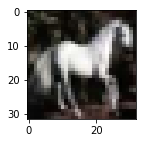


[Prediction] test data14 is truck, artifact, car and dark
[Actual]     test data14 is truck, artifact, car and dark


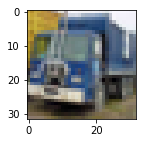


[Prediction] test data15 is ship, artifact, water and bright
[Actual]     test data15 is ship, artifact, water and dark


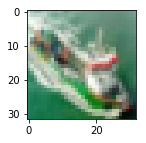


[Prediction] test data16 is dog, animal, mammal and bright
[Actual]     test data16 is dog, animal, mammal and bright


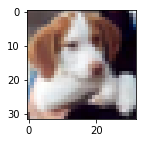


[Prediction] test data17 is cat, animal, mammal and bright
[Actual]     test data17 is horse, animal, mammal and bright


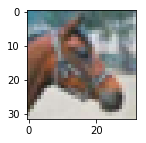


[Prediction] test data18 is ship, artifact, water and bright
[Actual]     test data18 is ship, artifact, water and bright


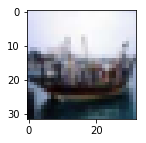


[Prediction] test data19 is frog, animal, water and dark
[Actual]     test data19 is frog, animal, water and dark


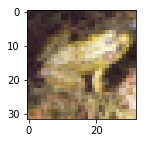

In [22]:
for i in range(20):
    plt.figure(figsize=(2, 2))
    print("[Prediction] test data{0} is {1}, {2}, {3} and {4}" \
          .format(i, label1[np.argmax(prediction[0][i])],
                     label2[np.argmax(prediction[1][i])],
                     label3[np.argmax(prediction[2][i])],
                     label4[np.argmax(prediction[3][i])]))
    print("[Actual]     test data{0} is {1}, {2}, {3} and {4}" \
          .format(i, label1[np.argmax(y_test1[i])],
                     label2[np.argmax(y_test2[i])],
                     label3[np.argmax(y_test3[i])],
                     label4[np.argmax(y_test4[i])]))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.show()
    print()